In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data from csv file
df = pd.read_csv('/content/data.csv')



# Convert categorical data to numerical data
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Split data into features and target
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.9/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.9/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# From Scratch Implementation of a Decision Tree Classifier

# Imports
from collections import Counter
import numpy as np


# Defining Entropy for the Decision Tree
def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])


# This Node Class defines the nodes of the decision tree
'''
  Each node has a feature to split on, a threshold value for the split, and left and right child nodes. 
  A node can also have a value if it is a leaf node, which represents the predicted value for that leaf.
'''
class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

# A helper function that checks if the given node is a leaf node or not.
# Only checks if the node has a value. If True, given node = leafNode

    def leaf_node(self):
        return self.value is not None


# Defining a class decision tree that initializes mini_sample_split, max_depth, n_features and root attributes

class DecisionTreeClassifier:
    def __init__(self, mini_sample_split=2, max_depth=100, n_features=None):
        self.mini_sample_split = mini_sample_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

# Fits the decision tree to the given data X and y. 
# n_features is set to the number of features in X or the minimum of itself.
# Method calls another function grow_tree to construct a tree

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(self.n_features, X.shape[1])
        self.root = self.grow_tree(X, y)

# Traverse the tree and return the array of predicted values

    def predict(self, X):
        return np.array([self.tree_traverse(x, self.root) for x in X])

# Recursive method to grow the tree

    def grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labs = len(np.unique(y))

        # stopping criteria
        if (
            depth >= self.max_depth
            or n_labs == 1
            or n_samples < self.mini_sample_split
        ):
            leaf_value = self.most_common_label(y)
            return Node(value=leaf_value)

        feature_index = np.random.choice(n_features, self.n_features, replace=False)

        # Select the best split according to information gain
        best_feature, best_threshold = self.best_criteria(X, y, feature_index)

        # grow the children recursively
        left_index, right_index = self._split(X[:, best_feature], best_threshold)
        left = self.grow_tree(X[left_index, :], y[left_index], depth + 1)
        right = self.grow_tree(X[right_index, :], y[right_index], depth + 1)
        return Node(best_feature, best_threshold, left, right)

# Selects the  best splitting criteria for a given subset of features

#  The method loops through each feature and each possible threshold,
#  and computes the information gain for the resulting split 

# The feature index and threshold with the highest information gain is returned.

    def best_criteria(self, X, y, feature_index):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feature_index:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self.info_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

# Information gain measures the decrease in entropy after the split.

    def info_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_ent = entropy(y)

        # generate split
        left_index, right_index = self._split(X_column, split_thresh)

        if len(left_index) == 0 or len(right_index) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        nl, nr = len(left_index), len(right_index)
        el, er = entropy(y[left_index]), entropy(y[right_index])
        child_ent = (nl / n) * el + (nr / n) * er

        # information gain is difference in loss before vs. after split
        ig = parent_ent - child_ent
        return ig

# Grouping of common features based on threshold

  # The indices of the samples whose feature values are less than or equal to
  # the threshold are returned as the left indices, and the indices of the
  # samples whose feature values are greater than the threshold are returned
  # as the right indices.

    def _split(self, X_column, split_thresh):
        left_index = np.argwhere(X_column <= split_thresh).flatten()
        right_index = np.argwhere(X_column > split_thresh).flatten()
        return left_index, right_index

# Traverse the Decision Tree and returns predicted label for a given input sample
    def tree_traverse(self, x, node):
        if node.leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self.tree_traverse(x, node.left)
        return self.tree_traverse(x, node.right)

# Returns most common label in the list of labels
    def most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common


# Driver Code
if __name__ == "__main__":

# Computes Matrices 
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    
    def precision(y_true, y_pred):
        true_pos = np.sum((y_true == 1) & (y_pred == 1))
        false_pos = np.sum((y_true == 0) & (y_pred == 1))
        return true_pos / (true_pos + false_pos)

    def recall(y_true, y_pred):
        true_pos = np.sum((y_true == 1) & (y_pred == 1))
        false_neg = np.sum((y_true == 1) & (y_pred == 0))
        return true_pos / (true_pos + false_neg)

    def f1_score(y_true, y_pred):
        p = precision(y_true, y_pred)
        r = recall(y_true, y_pred)
        return 2 * (p * r) / (p + r)


    dtc = DecisionTreeClassifier(max_depth=10)
    dtc.fit(X_train, y_train)

    y_pred = dtc.predict(X_test)
    acc = accuracy(y_test, y_pred)
    prec = precision(y_test, y_pred)
    rec = recall(y_test, y_pred)
    f1_sc = f1_score(y_test, y_pred)

    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-Score:", f1_sc)

Accuracy: 0.9385964912280702
Precision: 0.9285714285714286
Recall: 0.9069767441860465
F1-Score: 0.9176470588235294


In [ ]:
# From Scratch Implementation of a Random Forest Classifier

def bootstrap_samples(X, y):
  # Number of samples in X
    n_samples = X.shape[0]
  # Array of randomly chosen indices with replacement
    index = np.random.choice(n_samples, n_samples, replace=True)
  # using the indices to select samples from X and y
    return X[index], y[index]


def most_common_label(y):
  # counter object from the input labels
    counter = Counter(y)
  # use the most common label from the counter
    most_common = counter.most_common(1)[0][0]
    return most_common

# Random Forest Classifier for initializing the number of trees, mini_sample_split, max_depth and n_features
class RandomForestClassifier:
    def __init__(self, n_trees=100, mini_sample_split=2, max_depth=100, n_features=None):
        self.n_trees = n_trees
        self.mini_sample_split = mini_sample_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.trees = []

# Takes in training data X and y and creates new decision trees for each

#   Each decision tree is fit on a bootstrapped sample of the training data, 
#   and the resulting trees are stored in a list 'self.trees'.

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(
                mini_sample_split=self.mini_sample_split,
                max_depth=self.max_depth,
                n_features=self.n_features,
            )
            X_sample, y_sample = bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)


#   Takes a set of samples X and predicts for each sample by letting each tree 
#   make predictions for the sample. These predictions are aggregated and the most
#   common one is chosen as the result.

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)
    
    

# Driver Code
if __name__ == "__main__":
    
# Compute Matrices
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    def precision(y_true, y_pred):
        true_pos = np.sum((y_true == 1) & (y_pred == 1))
        false_pos = np.sum((y_true == 0) & (y_pred == 1))
        return true_pos / (true_pos + false_pos)

    def recall(y_true, y_pred):
        true_pos = np.sum((y_true == 1) & (y_pred == 1))
        false_neg = np.sum((y_true == 1) & (y_pred == 0))
        return true_pos / (true_pos + false_neg)

    def f1_score(y_true, y_pred):
        p = precision(y_true, y_pred)
        r = recall(y_true, y_pred)
        return 2 * (p * r) / (p + r)

    rfc = RandomForestClassifier(n_trees=20, max_depth=10)

    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    acc = accuracy(y_test, y_pred)
    prec = precision(y_test, y_pred)
    rec = recall(y_test, y_pred)
    f1_sc = f1_score(y_test, y_pred)
    
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-Score:", f1_sc)
    # print(X_scaled, y)

    

Accuracy: 0.956140350877193
Precision: 0.9523809523809523
Recall: 0.9302325581395349
F1-Score: 0.9411764705882352


In [ ]:
# Defining a function to visualize the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

def plot_conf_matrix(y_test, y_pred, plt_title):
    c_m=confusion_matrix(y_test, y_pred)
    print("\u0332".join('\n Main Implementation Classification Report \n'),'\n', classification_report(y_test, y_pred))
    sns.heatmap(c_m, fmt='g', annot=True, cmap='BuPu')
    plt.xlabel('Predicted Vals')
    plt.ylabel('Actual Vals')
    plt.title(plt_title)
    plt.show()
    return c_m


̲ ̲M̲a̲i̲n̲ ̲I̲m̲p̲l̲e̲m̲e̲n̲t̲a̲t̲i̲o̲n̲ ̲C̲l̲a̲s̲s̲i̲f̲i̲c̲a̲t̲i̲o̲n̲ ̲R̲e̲p̲o̲r̲t̲ ̲
 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



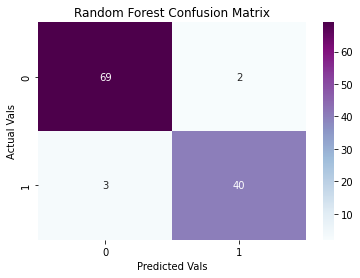

In [ ]:
cm_rfc= plot_conf_matrix(y_test, y_pred, 'Random Forest Confusion Matrix')

In [ ]:
# Cross Validation

from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

# K-Fold Cross Validation
def cross_valid(model, X, y, n_folds=5):
    kf = KFold(n_splits=n_folds, shuffle=True)

  # Initialize an empty list to store acc, prec, rec, f1_sc
    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []
  
  # Iterate through each fold and append the computed results to the respective lists
    for train_index, test_index in kf.split(X):

      # Split the data into train and trst for current fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

      # fit model on train data and make predictions on test
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc_scores.append(accuracy(y_test, y_pred))
        prec_scores.append(precision(y_test, y_pred))
        rec_scores.append(recall(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
    print("Accuracy: ", acc_scores)
    print("Precision: ", prec_scores)
    print("Recall: ", rec_scores)
    print("F1-Score: ", f1_scores)

    # Plot the graphs
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    axs[0, 0].plot(acc_scores)
    axs[0, 0].axhline(y=np.mean(acc_scores), color='r', linestyle='-')
    axs[0, 0].set_title('Accuracy')
    axs[0, 1].plot(prec_scores)
    axs[0, 1].axhline(y=np.mean(prec_scores), color='r', linestyle='-')
    axs[0, 1].set_title('Precision')
    axs[1, 0].plot(rec_scores)
    axs[1, 0].axhline(y=np.mean(rec_scores), color='r', linestyle='-')
    axs[1, 0].set_title('Recall')
    axs[1, 1].plot(f1_scores)
    axs[1, 1].axhline(y=np.mean(f1_scores), color='r', linestyle='-')
    axs[1, 1].set_title('F1-Score')
    plt.show()

  # Find the mean scores for the given list
    mean_acc = np.mean(acc_scores)
    mean_prec = np.mean(prec_scores)
    mean_rec = np.mean(rec_scores)
    mean_f1 = np.mean(f1_scores)

    return mean_acc, mean_prec, mean_rec, mean_f1


Accuracy:  [0.967032967032967, 0.945054945054945, 0.9340659340659341, 0.9340659340659341, 0.9560439560439561]
Precision:  [1.0, 0.9032258064516129, 0.8888888888888888, 0.9473684210526315, 0.96875]
Recall:  [0.9032258064516129, 0.9333333333333333, 0.9411764705882353, 0.9, 0.9117647058823529]
F1-Score:  [0.9491525423728813, 0.9180327868852459, 0.9142857142857143, 0.9230769230769231, 0.9393939393939394]


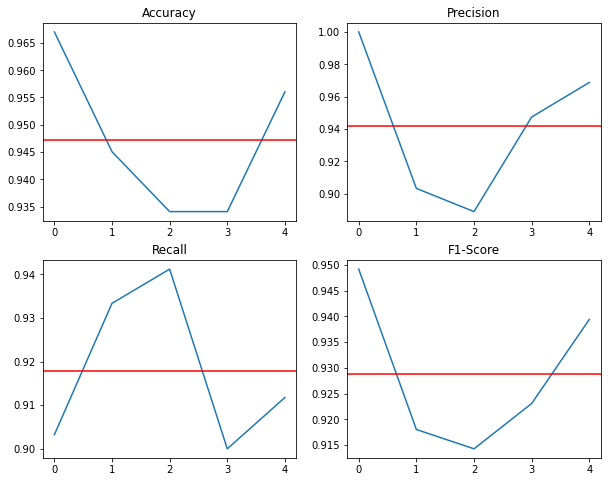

'\n  Here since I have used K-Fold cross-validation, the data is being divided into 5-folds\n  and for each fold, we are choosing params from the given set of hyperparameters.\n  As we observe the results, each split shows difference in evaluated matrics due to the change\n  in hyperparameters. And the final mean of each metric is close to the ones computed before by\n  the random forest classifier.\n  This shows the effect of hyperparameters in the performance of the model.\n'

In [ ]:
# Evaluate using cross-validation
acc, prec, rec, f1 = cross_valid(rfc, X_train, y_train)

'''
  Here since I have used K-Fold cross-validation, the data is being divided into 5-folds
  and for each fold, we are choosing params from the given set of hyperparameters.
  As we observe the results, each split shows difference in evaluated matrics due to the change
  in hyperparameters. And the final mean of each metric is close to the ones computed before by
  the random forest classifier.
  This shows the effect of hyperparameters in the performance of the model.
'''

In [ ]:
print("Cross-validation results:")
print("Mean Accuracy:", acc)
print("Mean Precision:", prec)
print("Mean Recall:", rec)
print("Mean F1-Score:", f1)

Cross-validation results:
Mean Accuracy: 0.9472527472527472
Mean Precision: 0.9416466232786267
Mean Recall: 0.9179000632511067
Mean F1-Score: 0.9287883812029408


# **Implementation Correctness**



In [ ]:
# Pre-Proc on Implementation Correctness


import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data from csv file
df2 = pd.read_csv('/content/implementation_correctness_dataset.csv')

X = df2.loc[:,['Feature 1','Feature 2']].values
y = df2['Class/Cluster'].values

# Selecting 12 datapoints at random using sample and training the model on those
selected_indices = df2.sample(n=12, random_state=42).index
X_train_new = X[selected_indices]
y_train_new = y[selected_indices]

X_test_new = np.array(X[4])
y_test_new = np.array(y[4])

# reshaping the data 
X_test_new = np.reshape(X_test_new,(1, X_test_new.size))
y_test_new = np.reshape(y_test_new,(1, y_test_new.size))

# # Printing all values
# print(X)
# print()
# print(y)
# print()
# print(X_test_new)
# print()
# print(y_test_new)
# print()
# print(X_train_new)
# print()
# print(y_train_new)


In [ ]:
# DTC on Implementation Correctness Dataset
dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(X_train_new, y_train_new)

y_pred_new = dtc.predict(X_test_new)


In [ ]:
# RFC on Implementation Correctness Dataset using 20 base trees
rfc = RandomForestClassifier(n_trees=20) 

rfc.fit(X_train_new, y_train_new)
y_pred_new = rfc.predict(X_test_new)


In [ ]:
# classify a test datapoint [4, 4]
test_datapoint = np.array([[4, 4]])

observations = []
# hashmap = {}
for n_tree in range(rfc.n_trees): 
  observations.append(str(rfc.predict(test_datapoint).tolist())) 
# for i in observations:
#   hashmap[i] = hashmap.get(i,0) + 1
print("Class Prediction of each of the 20 Trees:",observations)

predictions = rfc.predict(test_datapoint)
print("RFC Prediction:",predictions)



Class Prediction of each of the 20 Trees: ['[2]', '[2]', '[2]', '[2]', '[2]', '[2]', '[2]', '[2]', '[2]', '[2]', '[2]', '[2]', '[2]', '[2]', '[2]', '[2]', '[2]', '[2]', '[2]', '[2]']
RFC Prediction: [2]


In [ ]:
# Count the items in the list
item_counts = Counter(observations)

# Get the most common item(s)
most_common = item_counts.most_common()

# Separate the most common item(s) from the rest
maj = most_common[0][0]
mino = [item for item in observations if item != maj]


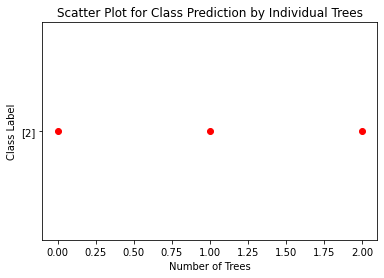

In [ ]:
# Plot the items
plt.title("Scatter Plot for Class Prediction by Individual Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Class Label")
plt.scatter(range(len(mino)), mino, color='blue')
plt.scatter(range(len(maj)), [maj]*len(maj), color='red')
plt.show()